# IT44 TP2: Interpolation polynomiale
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/interpolation.png'  width="500px">
            
    </tr>
</table>

Dans ce second TP vous allez implémenter la plupart des procédures vues en cours et TD concernant le chapitre 1 sur l'interpolation polynomiale. Une fois implémenter des algorithmes permettant de construire le polynôme d'interpolation, vous ferez des tests et appliquerez vos résultats à des cas concret. 



## Evaluation de polynômes

Dans un premier temps on s'intéresse à l'évaluation des polynômes.
1. Ecrire une première fonction ```Eval(C,A,t)``` qui étant donnée un vecteur de $n+1$ valeurs $(a_0,\dots,a_{n})$, un vecteur de $n$ centres $(c_1,\dots, c_n)$ et une valeur $t\in \mathbb{R}$, calcule 
$$p(t)=a_0+a_1\times(t-c_1)+a_2(t-c_1)(t-c_2)+\dots a_n \prod_{i=1}^n (t-c_i)$$
Cette première fonction calculera cette évaluation de la manière la plus naïve possible en calculant:
$$p(t)=\sum_{i=0}^n a_i \prod_{j=1}^i (t-c_j).$$
(on adoptera la convention suivante: $\prod_{j=1}^0=1$.
2. Proposer une seconde fonction ```EvalH(C, A,t)``` qui utilise l'algorithme de Hörner vue en cours.
3. Mesurer et comparer les temps d'execution des deux algorithmes. Pour cela vous pourrez utiliser la séquence suivante et faire des tests sur des polynômes choisis aléatoirement:
```Python
import time
start_time = time.time()
main()
print("---%s seconds ---" % (time.time() - start_time))
```

In [14]:
import random

### QUESTION 1

print("Question 1\n")

def Eval(C,A,t):
    
    res = 0

    n = len(A)
    
    for i in range(n):
        produit = 1
        for j in range(i):
            produit = produit * (t-C[j])
            #print("produit ", produit)
            
        res = res + produit * A[i]
        
        
    return res

#print(Eval([1,2,3],[2,3,4,5],4))

### QUESTION 2

def Eval_horner(C,A,t):
    n = len(A)
    #print(n)
    
    A2 = A
    
    #print("A1",A)
    #print("A2",A2)
    
    
    for i in range (n-2, -1, -1):
        #print("i ", i)
        A2[i] = A[i]+((t-C[i])*A2[i+1])
    return A2[0]

#print(Eval_horner([1,2,3],[2,3,4,5],4))


import time

def calculTempsEval(X,Y,n):
    start_time = time.time()
    print(Eval(X,Y,n))
    print("---%s seconds ---" % (time.time() - start_time))
    
def calculTempsHorner(X,Y,n): 
    start_time = time.time()
    print(Eval_horner(X,Y,n))
    print("---%s seconds ---" % (time.time() - start_time))

    
# cas d'exemple n°1

X = [1,4,10]
Y = [20,22,30,50]
n = 4

calculTempsEval(X,Y,n)
calculTempsHorner(X,Y,n)

# cas d'exemple n°2

X2 = [1,10,20,40,12]
Y2 = [1,4,5,40,50,12]
n2 = 6

calculTempsEval(X2,Y2,n2)
calculTempsHorner(X2,Y2,n2)

# cas d'exemple n°3

n3 = 15
X3 = []
Y3 = []

for i in range(n3):
    Y3.append(random.randint(1,30))

for j in range(n3-1):
    X3.append(random.randint(1,30))
    
calculTempsEval(X3,Y3,n3)
calculTempsHorner(X3,Y3,n3)



Question 1

86
---1.1920928955078125e-05 seconds ---
86
---7.152557373046875e-06 seconds ---
220561
---9.059906005859375e-06 seconds ---
220561
---5.9604644775390625e-06 seconds ---
-50763308510029
---2.4080276489257812e-05 seconds ---
-50763308510029
---9.059906005859375e-06 seconds ---


## Table des différences divisées

Ecrire un code ```Tab_diff_div(X,Y)``` qui étant donnée un vecteur représentant $n+1$ points de support $X=(x_0,\dots, x_n)$ et les valeurs correspondantes $(y_0,\dots y_n)$ calcule le vecteur des différences divisées correspondant.

In [15]:
import numpy


def tab(X,Y):
    
    n = len(Y)
    tab = numpy.zeros(n)
    
    for i in range(0,n):
        tab[i] = Y[i]
    
    for i in range(1,n):
        for j in range(n-1,i-1,-1):
            tab[j] = (tab[j]-tab[j-1])/(X[j]-X[j-i])
    return tab
            
        
    
print(tab([1,4,6],[1.5709,1.5727,1.5751]))    

[1.5709e+00 6.0000e-04 1.2000e-04]


## Polynôme d'interpolation

1. Ecrire une fonction ```valf(X)``` qui pour un vecteur $X=(x_0,\dots,x_n)$ renvoie le vecteur $Y=(y_0,\dots,y_n)$ tel que $y_i=f(x_i)$ (on pourra choisir $f(x)=\exp(x)$).
2. Ecrire une fonction ``` Interpol(n,X,Y)``` qui, à partrir de l'entier naturel non nul $n$ et des données $X=(x_0,\dots,x_n)$ et $(y_0,\dots,y_n)$ représentant respectivement des points de support $x_i$ et leurs images $y_i=f(x_i)$ produit le polynôme d'interpolation $p$ de degré $n$ tel que $p(x_i)=y_i$, sous la forme $P=[P[0],P[1]]$ où $P[0]$ est le vecteur des centres de la base de Newton et $P[1]$ est le vecteur des coefficients correspondant.

In [16]:
import numpy

def valf(X):
    Y = X
    X2 = X
    for i in range(len(X)):
        Y[i] = numpy.exp(X2[i])
    
    return Y


def interpol(n,X,Y):
    #print("X dans fct interpol : ", X)
    P = [[0]*(n+1), [0]*(n+1)]
    
    #initialiser les valeurs
    for i in range(n+1):
        P[0][i] = X[i]
        P[1][i] = Y[i]
       
    #print(P[0])
    coef = tab(X,Y)
    
    for i in range(n+1):
        P[1][i] = coef[i]
    
    return P
        
#interpol(2,[1,4,6],[1.5709,1.5727,1.5751])
#interpol(4,[1,4,6,7,8],[1.5709,1.5727,1.5751,2,3])

## Applications

1. Utiliser les codes ci-dessus pour construire $p_{8,1}$ le polynôme d'interpolation de la fonction $\exp$ sur le support $X1$ équiréparti tel que $x_0=-1, x_1=-\frac{3}{4},\dots,x_8=1$.
2. Utiliser les codes ci-dessus pour constuire $p_{8,2}$, le polynôme d'interpolation de la fonction $\exp$ sur le support $X2$ définit par les huits points de Tchebyschev:
$$\forall j\in \{0,\dots,8\}, X2[j]=\cos(\dfrac{(2j+1)\pi}{18})$$
3. Visualiser graphiquement l'erreur commise en valeur absolue lors de l'approximation de la fonction $\exp$ par $p_{8,1}$ et $p_{8,2}$.

QUESTION 2 : erreur avec Cos 



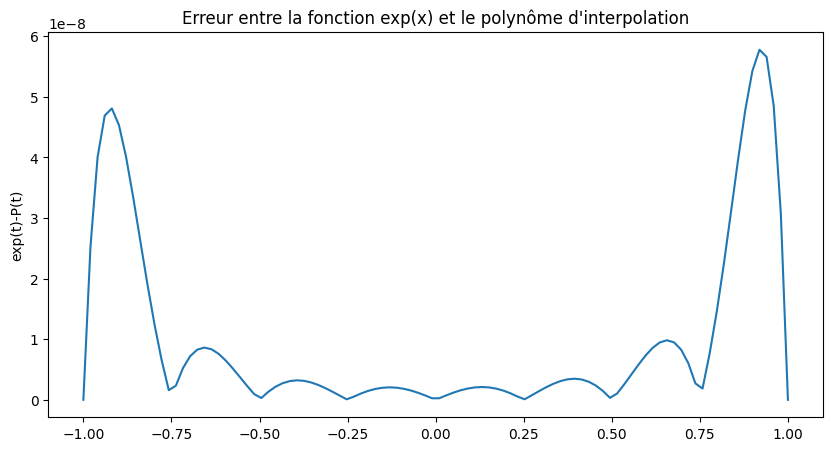

In [17]:
import numpy
import matplotlib.pyplot as plt

#init support
def initSupport():
    X1 = [-1]
    for i in range(8):
        X1.append(X1[i]+1/4)
    return X1


#calculer f(xi)

def calculF(X):
    Y1 = valf(X)
    return Y1


def interPol2(n,X,Y):
    return interpol(n,X,Y)

#### QUESTION 1

X1 = initSupport()
Y1 = calculF(X1)

X2 = initSupport()
P = interPol2(8,X2,Y1)

print("QUESTION 2 : erreur avec Cos \n")
#print("X2 : ", X2, "\n")
#print("Y1 : ", Y1, "\n")
#print("P : ", P, "\n")


#Eval_horner(P[0],P[1],x)

# tracer le polynome exp
x = numpy.linspace(-1, 1, 100)
y = Eval_horner(P[0],P[1],x)

# dimensionner le graph
fig = plt.figure(figsize = (10, 5))

errX = numpy.linspace(-1, 1, 100)
errY = numpy.abs(numpy.exp(errX)- y)

plt.plot(errX,errY)
plt.ylabel("exp(t)-P(t)")
plt.title("Erreur entre la fonction exp(x) et le polynôme d'interpolation")
#plt.plot(x, y, linewidth=1)

# montrer le graph
plt.show()


QUESTION 2 : erreur avec Tchebyschev 



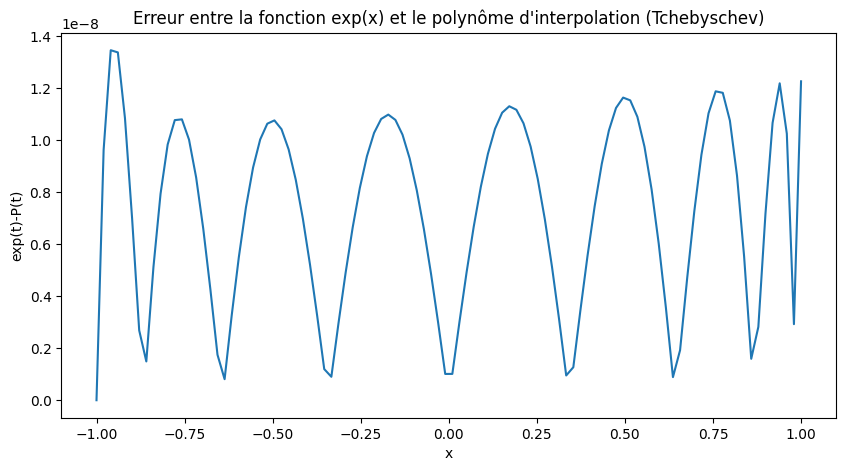

In [54]:
import numpy
import matplotlib.pyplot as plt

#init support
def initSupport():
    X1 = [-1]
    for j in range(8):
        X1.append(numpy.cos(((2*j+1)*numpy.pi)/18))
    return X1


#calculer f(xi)

def calculF(X):
    Y1 = valf(X)
    return Y1


def interPol2(n,X,Y):
    return interpol(n,X,Y)

#### QUESTION 2

X1 = initSupport()
Y1 = calculF(X1)

X2 = initSupport()
P = interPol2(8,X2,Y1)

print("QUESTION 2 : erreur avec Tchebyschev \n")
#print("X2 : ", X2, "\n")
#print("Y1 : ", Y1, "\n")
#print("P : ", P, "\n")


#Eval_horner(P[0],P[1],x)

# tracer le polynome
x = numpy.linspace(-1, 1, 100)
y = Eval_horner(P[0],P[1],x)

#expX = numpy.linspace(-6, 6, 100)
#expY = numpy.exp(expX)


# dimensionner le graph
fig = plt.figure(figsize = (10, 5))
#plt.plot(x, y, linewidth=1)
#plt.plot(expX, expY, linewidth=1)

errX = numpy.linspace(-1, 1, 100)
errY = numpy.abs(numpy.exp(errX)- y)

plt.plot(errX,errY)
plt.xlabel("x")
plt.ylabel("exp(t)-P(t)")
plt.title("Erreur entre la fonction exp(x) et le polynôme d'interpolation (Tchebyschev)")

# montrer le graph
plt.show()


## Généralisation

Généraliser ce qui précède pour construire le polynôme d'interpolation d'une fonction $f$ pour un support quelconque (i.e. en autorisant la répétition des points). On supposera que l'on sait dériver $f$ et on pourra construire une fonction ```valdf(\tilde{X})```qui retourne le vecteur des valeurs de la dérivée de $f$ pour un support extrait de $X$.

## Phénomène de Runge

On considère la fonction $f(x)=\dfrac{1}{1+25x^2}$ pour $x\in [-1,1]$ et on considère les supports $X_n=\{x_0,\dots,x_n\}$ tels que $x_0=-1, x_n=1$ et $x_{i+1}=x_i+h$ avec $h=\frac{2}{n}$.

Tracer sur le même graphique la fonction $f$ et plusieurs polynôme d'intepolation $p_n$ pour différentes valeurs de $n$. Qu'observez-vous ?

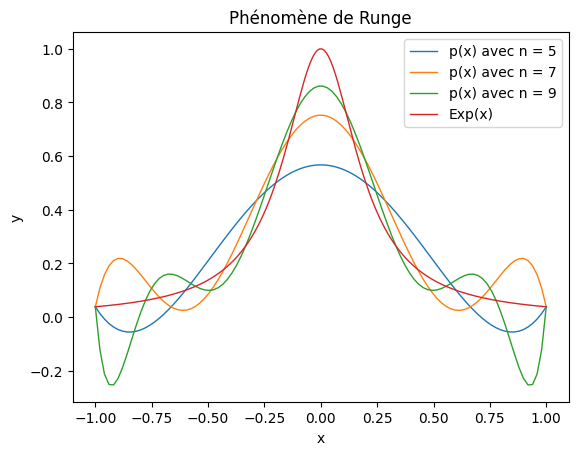

In [55]:
import numpy
import matplotlib.pyplot as plt

# fonction f(x) entre -1 et 1
x = numpy.linspace(-1, 1, 200)
y = 1/(1+25*x**2)



## réutiliser les fonctions écrites précédemment

#init support
def initSupport1(n):
    X1 = [-1]
    for j in range(1,n):
        X1.append(X1[j-1]+2/n)
    X1.append(1)
    return X1

# calcul f(x)
def valf1(X):
    Y = []
    n = len(X)
    for i in range(n):
        Y.append (1/(1+25*(X[i])**2))
    return Y

def tab1(X,Y):
    
    n = len(Y)
    tab = numpy.zeros(n)
    
    for i in range(0,n):
        tab[i] = Y[i]
    
    for i in range(1,n):
        for j in range(n-1,i-1,-1):
            tab[j] = (tab[j]-tab[j-1])/(X[j]-X[j-i])
    return tab

def interpol1(n,X,Y):
    P = [[0]*(n+1), [0]*(n+1)]
    
    #initialiser les valeurs
    for i in range(n):
        P[0][i] = X[i]
        P[1][i] = Y[i]
       
    #print(P[0])
    coef = tab1(X,Y)
    
    for i in range(n+1):
        P[1][i] = coef[i]
    
    return P

def Eval_horner1(C,A,t):
    n = len(A)
    #print(n)
    
    A2 = A
    
    #print("A1",A)
    #print("A2",A2)
    
    
    for i in range (n-2, -1, -1):
        #print("i ", i)
        A2[i] = A[i]+((t-C[i])*A2[i+1])
    return A2[0]

# poly 1 avec n = 5

def polynomeInterpol(n):
    supportX1 = initSupport1(n)
    valeurY1 = valf1(supportX1)


    #print("Support : ",supportX1, "\n" )
    #print("Valeurs : ",valeurY1, "\n" )

    poly = interpol1(n,supportX1,valeurY1)
    #print("Poly : ",poly, "\n" )


    # tracer le polynome exp
    xPoly1= numpy.linspace(-1, 1, 100)
    yPoly1 = Eval_horner1(poly[0],poly[1],xPoly1)

    plt.title("Phénomène de Runge")
    plt.plot(xPoly1, yPoly1, linewidth=1, label='p(x) avec n = %.i' %(n))
    plt.ylabel("y")
    plt.xlabel("x")
    plt.legend()
    
    

polynomeInterpol(5)
polynomeInterpol(7)
polynomeInterpol(9)
#polynomeInterpol(10)

plt.plot(x, y, linewidth=1, label="Exp(x)")
plt.legend()
plt.show()

# plus le degré augmente, plus l'interpolation est mauvaise

In [56]:
print("TP réalisé par Maxime SZATKOWSKI & Célia LEICHTNAM ")

TP réalisé par Maxime SZATKOWSKI & Célia LEICHTNAM 
